In [1]:
# standard imports:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Getting data to be used with ML model:
* Three main things to do:
-> Split the data into features and labels (Usually 'X' and 'y')
-> Filling (also called imputing) or disregarding missing values
-> Converting non-numerical values to numerical values (also called feature encoding)

In [2]:
# import dataset:
heart_disease = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Matplotlib/heart-disease.csv")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y = heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
# Split data into training and test_sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape[0] * 0.8

242.4

In [8]:
len(heart_disease)

303

## Getting Data Ready:
## Convert Data to Numbers

In [9]:
car_sales = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Scikit-Learn/car-sales-extended.csv")

In [10]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [11]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
len(car_sales)

1000

In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [14]:
# split the data (X/y)

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# build the machine learning model:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# turn the categories into numbers:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one-hot", one_hot, categorical_features)],
                                remainder="passthrough")

transformered_X = transformer.fit_transform(X)
transformered_X

In [ ]:
pd.DataFrame(transformered_X)

In [ ]:
X

In [ ]:
# method02 using dummies in pandas
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformered_X, y, test_size=0.2)

model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

## Handling missing values with Pandas

## what if there were missing values?

1. Fill them with some values (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
# import car sales missing data:
car_sales_missing = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Scikit-Learn/car-sales-extended-missing.csv")
car_sales_missing

In [ ]:
car_sales_missing.isna()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# create X and y:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
# convert our data to numbers:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features_miss = ["Make", "Colour", "Doors"]

one_hot_miss = OneHotEncoder()

transformer_miss = ColumnTransformer([("one-hot", one_hot_miss, categorical_features_miss)],
                                     remainder="passthrough")

transformered_X_miss = transformer_miss.fit_transform(X)
transformered_X_miss

In [ ]:
car_sales_missing

# Method-1: Fill missing data with Pandas

In [ ]:
# fill the "make" column:
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column:
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer" column:
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column:
car_sales_missing["Doors"].fillna(4, inplace=True)

In [ ]:
# check our dataframe again:
car_sales_missing.isna().sum()

# we are trying to predict the price col so we leave it unchanged:

In [ ]:
# remove the rows with missing Price value:
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
len(car_sales_missing)

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features_miss = ["Make", "Colour", "Doors"]

one_hot_miss = OneHotEncoder()

transformer_miss = ColumnTransformer([("one-hot", one_hot_miss, categorical_features_miss)],
                                     remainder="passthrough")

transformered_X_miss = transformer_miss.fit_transform(car_sales_missing)
transformered_X_miss

# Method-2: Fill missing data using Scikit-learn

In [ ]:
car_sales_missing = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Scikit-Learn/car-sales-extended-missing.csv")
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# drop the rows with no labels:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

In [ ]:
# split into X and y:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
X.isna().sum()

In [ ]:
# Fill missing values with Scikit learn:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean:
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns:
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create and imputer (something that fills the missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data:
filled_X = imputer.fit_transform(X)
filled_X

In [ ]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
# converting our data into numbers:

categorical_features_filled = ["Make", "Colour", "Doors"]
one_hot_filled = OneHotEncoder()
transformer_filled = ColumnTransformer([
    ("one_hot_filled", one_hot_filled, categorical_features_filled)],
    remainder = "passthrough"
)

transformed_X_fill = transformer_filled.fit_transform(car_sales_filled)
transformed_X_fill

# now we have got our data as numbers and filled (no missing values)
# lets fit a model:

In [ ]:
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X_fill,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=1000)  # default value is 100

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
len(car_sales_filled), len(car_sales)

## 2. Choosing the right estimator/algorithm for your problem:

Note:
* Sklearn refers to machine learning models, algorithms as estimators.
* Estimators have classifiers and Regressors.
* Classification Problem: predicting a category (heart disease or not).
    * sometimes we see `clf` (short for classifier) used as a classification estimator
* Regression Problem: predicting a number (selling price of car)

## 2.1 Picking a ml model for a regression problem:
California Housing Dataset

In [ ]:
# Get california housing dataset:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing;

In [ ]:
housing_df = pd.DataFrame(housing["data"])
housing_df

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

In [ ]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

# we will be predicting medHouseVal (Median House Value)
# house value = median house value * 100,000 (in california) ($)

In [ ]:
housing_df["target"] = housing["target"]
housing_df

In [ ]:
# drop the MedValCol:
housing_df = housing_df.drop("MedHouseVal", axis=1)
housing_df

## Ridge Regression Model:

In [ ]:
# import algorithm/estimator
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]  # median house price in $100,000

# Split into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model on the test set:
model.score(X_test, y_test)  # gives us the R^2 score

# Lasso:

In [ ]:
from sklearn.linear_model import Lasso

X_lass = housing_df.drop("target", axis=1)
y_lass = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_lass, y_lass, test_size=0.2)

model = Lasso()
model.fit(X_train, y_train)

model.score(X_test, y_test)

# Elastic-Net

In [ ]:
from sklearn.linear_model import LassoLars
X_lass = housing_df.drop("target", axis=1)
y_lass = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_lass, y_lass, test_size=0.2)

model = LassoLars()
model.fit(X_train, y_train)

model.score(X_test, y_test)

# SVR

In [ ]:
# from sklearn.svm import SVR
# X_lass = housing_df.drop("target", axis=1)
# y_lass = housing_df["target"]
#
# X_train, X_test, y_train, y_test = train_test_split(X_lass, y_lass, test_size=0.2)
#
# model = SVR(kernel="linear")
# model.fit(X_train, y_train)
#
# model.score(X_test, y_test)

 What is `Ridge` didnt work we can refer to another model/estimators:

* We could always try a different model:
* How about we try an ensemble model (an ensemble is a combination of smaller models to try and make better predictions than just a single model !
* Sklearn's ensemble models can be found here: "https://scikit-learn.org/stable/modules/ensemble.html"

In [ ]:
# import the RandomForestRegressor model class from the ensemble module:
from sklearn.ensemble import RandomForestRegressor

# setup random seed:
np.random.seed(42)

# create the data:
X_Rforest = housing_df.drop("target", axis=1)
y_Rforest = housing_df["target"]

# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X_Rforest, y_Rforest, test_size=0.2)

# Instantiate the model:
model = RandomForestRegressor()  ## 100 decision trees predicting our data!

model.fit(X_train, y_train)

model.score(X_test, y_test)

# 2.2 Picking a machine learning model for a classification problem:

In [ ]:
heart_disease = pd.read_csv("/Users/yash/Development/ZTM_Machine_Learning_Data_Science/Matplotlib/heart-disease.csv")

heart_disease.head()

In [ ]:
# import LinearSVC estimator class:
from sklearn.svm import LinearSVC

# Setup random seed:
np.random.seed(42)

# Make the data:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model instantiated:
clf = LinearSVC(max_iter=100000)  # by default its value is 1000

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
heart_disease["target"].value_counts()

In [ ]:
# Import random forest classifier estimator class:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed:
np.random.seed(42)

# Make the data:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model instantiated:
clf = RandomForestClassifier()  # by default its value is 1000
clf.fit(X_train, y_train)

# Evaluate the random forest classifier:
clf.score(X_test, y_test)

## Note:
## * If you have structured data use ensemble learning
## * if you have unstructured data use deep learning or transfer learning

# 3. Fit the model/algorithm on our data and use it to make predicitions

### 3.1 Fitting the model to data

Different names for:
* X = features, features variables, data
* y = labels, targets, target variables

In [16]:
# Import random forest classifier estimator class:
from sklearn.ensemble import RandomForestClassifier

# Setup random seed:
np.random.seed(42)

# Make the data:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# model instantiated:
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to our data: (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the random forest classifier: (use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

ML model helps us to find patterns in our data [atleast in Supervised Learning]

In [17]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Make predictions using an ML model

Two ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [19]:
X_test.shape

(61, 13)

In [20]:
# Use a trained Model to make Predictions:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [21]:
y_test   # truth/ ground truth labels

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [22]:
# Compare predictions to truth labels to evaluate model:
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

## Make predictions with predict_proba()

In [24]:
# predict_proba() returns probabilities of a classification label.
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [25]:
# Lets predict() on same data:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

# Making predictions with our model-REGRESSION

In [26]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=1000)

model.fit(X_train, y_train)

# make predicitons:
y_preds = model.predict(X_test)
model.score(X_test, y_test)

NameError: name 'housing_df' is not defined

the default score() evaluation metric is r_squared for regression algorithm
highest = 1.0, lowest = 0.0

In [27]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [28]:
np.array(y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [29]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.14754098360655737

## 4. Evaluating A machine Learning Model

Three ways to evaluate Scikit-Learn Models/Estimators:
    1. Estimator's built-in `score()` method
    2. The `scoring` parameter
    3. Problem-specific metric functions

### 4.1 Evaluating a model with the `score()` method:

In [30]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Create train/test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create classifier model instance:
clf = RandomForestClassifier()
# fit the classifier to training data:
clf.fit(X_train, y_train)

RandomForestClassifier()

Highest value for the .score() method is 1.0 and lowest is 0.0

In [31]:
clf.score(X_train, y_train)

1.0

In [32]:
clf.score(X_test, y_test)

0.8524590163934426

### 4.2 Evaluating a model with the `cross_val_score()` method:

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Create train/test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create classifier model instance:
clf = RandomForestClassifier()
# fit the classifier to training data:
clf.fit(X_train, y_train);

In [34]:
clf.score(X_test, y_test)

0.8524590163934426

In [35]:
cross_val_score(clf, X, y)   # cv = 5 {cv is Cross validation}

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

* model is trained on 5 Different versions of training data and evaluated on 5 different versions of the test data
* we get 5 different scores/ results of how our clf performs

In [36]:
np.random.seed(42)

# single training and test split score:
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross validation score:
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two:
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [38]:
# Default scoring parameter of classifier = mean accuracy
clf.score(X, y)

0.9702970297029703

In [39]:
np.random.seed(42)
# Scoring parameter is set to NONE by default:
cross_val_score(clf, X, y, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## 4.2.1 Classification Model Evaluation Metrics:

1. Accuarcy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

### 1. Accuracy:

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

cross_val_score =cross_val_score(clf, X, y, cv = 5)

In [43]:
np.mean(cross_val_score)

0.8248087431693989

In [44]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score)  * 100 : .2f}% ")

Heart Disease Classifier Accuracy:  82.48% 


## Area under the Reciever operating characteristic curve (AUC/ROC)

* Area under curve (AUC)
* ROC curve

-> ROC curve are a comparison of a model's true positive rate (TPR) v/s a model's false positive rate (FPR)

* True Positive = model predicts 1 when truth is 1
* False Positive = model predicts 1 when truth is 0
* True Negative = model predicts 0 when truth is 0
* False Negative = model predicts 0 when truth is 1

In [46]:
# create train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the class:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
from sklearn.metrics import roc_curve

# Make predictions with Probabilities:
y_probs = clf.predict_proba(X_test)

y_probs

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.16, 0.84],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.32, 0.68],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.72, 0.28],
       [0.79, 0.21],
       [0.1 , 0.9 ],
       [0.31, 0.69],
       [0.06, 0.94],
       [0.34, 0.66],
       [0.27, 0.73],
       [0.57, 0.43],
       [0.77, 0.23],
       [0.22, 0.78],
       [0.14, 0.86],
       [0.92, 0.08],
       [0.48, 0.52],
       [0.22, 0.78],
       [0.99, 0.01],
       [0.35, 0.65],
       [0.67, 0.33],
       [0.88, 0.12],
       [0.91, 0.09],
       [0.84, 0.16],
       [0.73, 0.27],
       [0.18, 0.82],
       [0.97, 0.03],
       [0.33, 0.67],
       [0.31, 0.69],
       [0.32, 0.68],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.26, 0.74],
       [0.57, 0.43],
       [0.63, 0.37],
       [0.71, 0.29],
       [0.02, 0.98],
       [0.28, 0.72],
       [0.58, 0.42],
       [0.2 , 0.8 ],
       [0.97,

In [48]:
y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.16, 0.84],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.32, 0.68],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ]])

Note: y_true is same as y_test

In [49]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.06, 0.58, 0.84, 0.5 , 0.75, 0.76, 0.68, 0.93, 0.01, 1.  ])

In [50]:
# Calculate FPR, TPR and Thresholds:

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the flase positive rate:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.12, 0.12,
       0.12, 0.12, 0.6 , 0.64, 0.76, 0.88, 0.96, 1.  ])

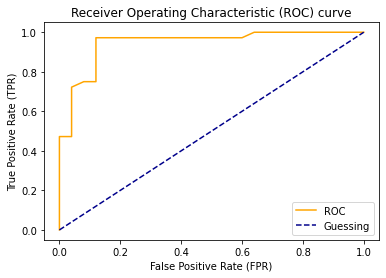

In [51]:
# create a function for plotting ROC curves:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """

    # Plot roc curve:
    plt.plot(fpr, tpr, color="orange", label="ROC")

    # Plot line with no predictive power (baseline):
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")

    # Customise the plot:
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [52]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9444444444444445

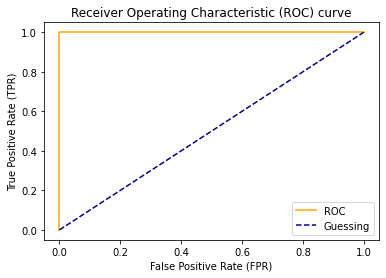

In [53]:
# Plotting perfect ROC curve and AUC score:

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [54]:
# Perfect AUC score:
roc_auc_score(y_test, y_test)

1.0

## Confusion Matrix:

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predtict.
In essence, giving you an idea of where the model is getting confused.

In [55]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[22,  3],
       [ 5, 31]])

In [56]:
# visualise confusion matrix with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,22,3
1,5,31


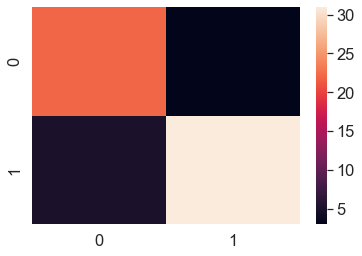

In [57]:
# make our confusion matrix more visual seaborn heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale = 1.5)

# create a confusion matrix:
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat);

In [ ]:
# how to install a conda package into the current env using a jupyter notebook:
#
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn